# Video Game Sales Model
### Goals
This project aims to answer 2 questions

* Rather the population size of a region has a relation to carbon emissions.
* Was there a significant effect on carbon emissions based on year and state

### Project Members:
* [Laurent Mundell](https://github.com/LaurentStar)
* [Joe Hart](https://github.com/joseh4)


### Table of Contents
    -Imports
    -Data Sources
    -Load Data
    -Methods/Globals/Constants
    -Explore Data Analysis
    -Explore Data Visuals
    -Data Prep
    -Hypothesis Test I
    -Hypothesis Test II


* [Video Game Sales with Ratings](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)
* [Google Trends work around](https://www.quora.com/How-can-I-see-absolute-search-number-volume-on-Google-Trends)

# Imports

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Load Data

In [156]:
file_path  = os.path.join('data', 'Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(file_path)

# Methods/Globals/Constants

In [157]:
def fillna_average_by_target_column(row, avg_dict, target_col, effected_col):
    """
    When given a row of a dataframe, this method will use the target column to fill nan values with 
    the average associated with the catagorical values in the effected column. 
    
    Parameters
    ----------
    row :  Dataframe row.
    avg_dict : A dictionary of the average of the catagorical values in the target column of the dataframe
    target_col : index of where the target column is in the dataframe
    effected_col :  index of where the effected column is in the dataframe
    
    Returns
    -------
    a dataframe row with effect column value changed if it is null
    """
    try:
        if np.isnan(row[effected_col]):      
            row[effected_col] = np.round(avg_dict[row[target_col]], 2)
    except:
        pass #row[effected_col] = "???"
        
    return row



GENRE_CRITIC_SCORE_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['Critic_Score'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['Critic_Score'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['Critic_Score'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['Critic_Score'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['Critic_Score'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['Critic_Score'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['Critic_Score'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['Critic_Score'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['Critic_Score'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['Critic_Score'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['Critic_Score'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['Critic_Score'].mean(),
}

GENRE_CRITIC_COUNT_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['Critic_Count'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['Critic_Count'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['Critic_Count'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['Critic_Count'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['Critic_Count'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['Critic_Count'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['Critic_Count'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['Critic_Count'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['Critic_Count'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['Critic_Count'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['Critic_Count'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['Critic_Count'].mean(),
}


# Fix user score to get the average values
video_game_df['User_Score'] = video_game_df['User_Score'].replace(to_replace = 'tbd', value = np.nan).astype(float)

GENRE_USER_SCORE_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['User_Score'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['User_Score'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['User_Score'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['User_Score'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['User_Score'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['User_Score'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['User_Score'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['User_Score'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['User_Score'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['User_Score'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['User_Score'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['User_Score'].mean(),
}

GENRE_USER_COUNT_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['User_Count'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['User_Count'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['User_Count'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['User_Count'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['User_Count'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['User_Count'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['User_Count'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['User_Count'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['User_Count'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['User_Count'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['User_Count'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['User_Count'].mean(),
}


PUBLISHER_GLOBAL_AVG = {}

for publisher in global_df['Publisher'].unique():
    PUBLISHER_GLOBAL_AVG[publisher] = global_df[video_game_df['Publisher'] == publisher]['Global_Sales'].mean()


STYLE = {'purple' : '\033[95m',
               'cyan' : '\033[96m',
               'darkcyan' : '\033[36m',
               'blue' : '\033[94m',
               'green' : '\033[92m',
               'yellow' : '\033[93m',
               'red' : '\033[91m',
               'bold' : '\033[1m',
               'underline' : '\033[4m',
               'end' : '\033[0m'
}


NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

<Figure size 432x288 with 0 Axes>

# Exploratory Data Analysis

In [191]:
global_df = video_game_df.drop(['NA_Sales',
                            'EU_Sales', 
                            'JP_Sales', 
                            'Other_Sales', 
                            'Critic_Score',
                            'Critic_Count',
                            'User_Score',
                            'User_Count'], axis=1)

In [66]:
"""
-Basic general statistics about the data.
-Rating appears to be missing many values
-Developer is also missing a large chuck of data
"""

display(global_df.head())
display(global_df.info())
display(global_df.describe().T)
print('Shape:', global_df.shape)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
Global_Sales       16719 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


None

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53


Shape: (16719, 8)


In [67]:
"""
-Checking missing values by year of release.
-Total missing values are 6543 observations which ~ 40% of the data
"""
print(global_df.shape)
print(global_df[global_df.Developer.isna()].Year_of_Release.value_counts().sum())
print('missing data percentage', 
      (global_df[global_df.Developer.isna()].Year_of_Release.value_counts().sum()/global_df.shape[0])*100)
global_df[global_df.Developer.isna()].Year_of_Release.value_counts()

(16719, 8)
6543
missing data percentage 39.13511573658712


2010.0    451
2008.0    438
2011.0    409
2009.0    407
2007.0    376
1998.0    346
2006.0    326
1999.0    296
2012.0    285
1997.0    268
2015.0    267
1996.0    255
2005.0    232
2014.0    230
2013.0    221
1995.0    219
2000.0    200
2016.0    190
2002.0    174
2004.0    162
2003.0    162
2001.0    143
1994.0    120
1993.0     62
1981.0     46
1992.0     41
1991.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1987.0     16
1990.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
2017.0      3
Name: Year_of_Release, dtype: int64

In [68]:
"""
Checking the amount of values t
"""

_ = ((global_df["Global_Sales"]>=1) & (global_df["Global_Sales"]<=2)) # It is just a throw away variable name
global_df[_].shape

(1224, 8)

# Exploratory Data Visualization

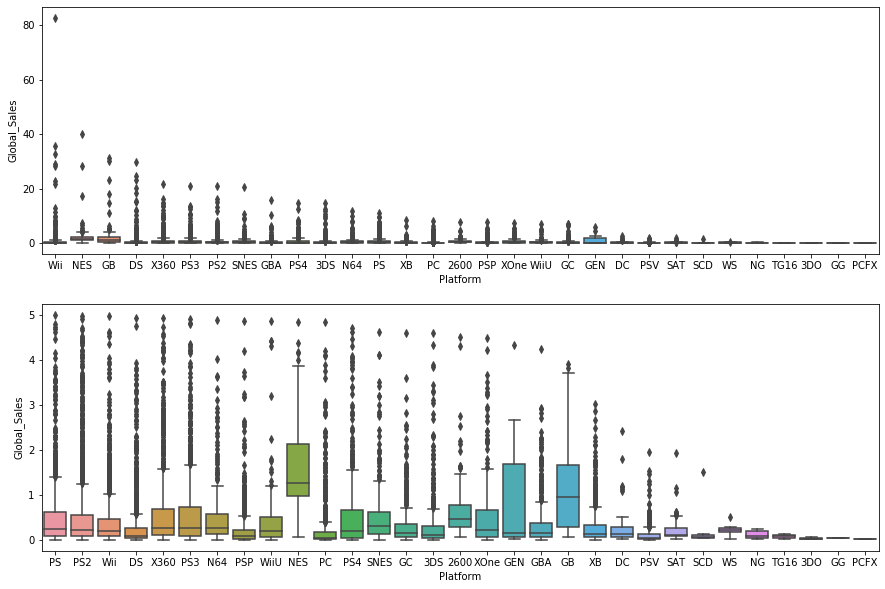

In [73]:
"""
- The boxplot reveal many outlier for each platform however it seems most outlier are positive
"""

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
sns.boxplot(x="Platform", y="Global_Sales", data=global_df, ax=ax[0])
sns.boxplot(x="Platform", y="Global_Sales", data=global_df[global_df["Global_Sales"]<=5], ax=ax[1]);

# Data Prep

In [202]:
#display(global_df.head())
#display(global_df.info())
# display(global_df.describe().T)
# print('Shape:', global_df.shape)

In [192]:
"""
-Unable to identify developers and rating. classifying nan values as unknown for now
"""

global_df['Developer'].fillna('Unknown', inplace=True)
global_df['Rating'].fillna('Unknown', inplace=True)

In [193]:
"""
-Only two values missing from genre so we removed the rows
-Year_of-release has ~ 300 rows missing but this only 1.6% of the remaining observations so we removed them too. 
-The publisher had ~ 30 rows missing after removing the nan row. this is less than 1% of the remaining
 data so it was nans were removed
-

"""

global_df.dropna(subset=['Genre', 'Year_of_Release', 'Publisher'], inplace=True)

In [194]:
"""
- We made a new column of the len in characters for each game name to check if name len had an effect on global sales
- We also counted the number of words in each name for the same purpose
"""

global_df['Name_Character_Length'] = global_df['Name'].map(lambda name : len(name))
global_df['Name_Word_Count'] = global_df['Name'].map(lambda name : len(name.split()))

In [195]:
"""
- A decision was made to model after plaforms released 2007 and onward and to exclude handhelds.
- DC (DreamCast) is a special exception 
"""

_ = ((global_df['Year_of_Release'] > 2007) 
     & (global_df['Platform'].isin(['DC', 'DS', 'GB', 'PSP', '3DS', 'PSV']) == False))
global_df = global_df[_]

In [196]:
"""
One hot encoding three catagorical columns because they don't have too many unique values
"""

_ = pd.get_dummies(global_df['Rating'], drop_first=True)
global_df = pd.concat([global_df, _], axis=1)

_ = pd.get_dummies(global_df['Genre'], drop_first=True)
global_df = pd.concat([global_df, _], axis=1)

_ = pd.get_dummies(global_df['Platform'], drop_first=True)
global_df = pd.concat([global_df, _], axis=1)

In [164]:
"""
Drop all columns not needed to build models
"""
global_df.drop(columns=['Developer', 'Name', 'Platform', 'Genre', 'Rating'], inplace=True)

In [244]:
# #Fill all nan value with the average by genre
# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_SCORE_AVG, 3, 10),  axis=1)


# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 11),  axis=1)
# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_USER_SCORE_AVG, 3, 12),  axis=1)
# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 13),  axis=1)

# #Drop all related sales columns
# video_game_null_fill_df.drop(columns=['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)

# #Drop all release year Nan  rows Appoximity ~ 300 rows
# #video_game_null_fill_df.dropna(subset=['Year_of_Release', 'Genre'], inplace=True)

# # Make release a simple int type to represent it more accuracly 
# video_game_null_fill_df['Year_of_Release'] = video_game_null_fill_df['Year_of_Release'].astype(int)

# # Convert user score to float to represent accurately
# video_game_null_fill_df['User_Score'] = video_game_null_fill_df['User_Score'].astype(float)

# # Drop all observation below the year 1990
# video_game_null_fill_df = video_game_null_fill_df[video_game_null_fill_df['Year_of_Release'] > 1995]

# Modeling

In [209]:
x_columns = ['Year_of_Release',
 'Name_Character_Length',
 'Name_Word_Count',
 'E10+',
 'EC',
 'M',
 'RP',
 'T',
 'Unknown',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Platform_PS2',
 'Platform_PS3',
 'Platform_PS4',
 'Platform_Wii',
 'Platform_WiiU',
 'Platform_X360',
 'Platform_XB',
 'Platform_XOne',
 'Publisher',
 'Global_Sales']

In [210]:
X = global_df[x_columns]

y = global_df.Global_Sales

log_y = np.log(y)

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
 X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size= 0.2)

In [214]:
#Make copy of publisher and iterative alter yourself until you contain mean avg
X_train['Publisher_Avg'] = X_train['Publisher']

for publisher in X_train['Publisher'].unique():
    mean = X_train[X_train['Publisher_Avg'] == publisher]['Global_Sales'].mean()
    X_train['Publisher_Avg'] = X_train['Publisher_Avg'].replace(to_replace = publisher, value=mean)

scripts//methods_globals_constants.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
scripts//methods_globals_constants.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Parameters


In [218]:
X_train.drop(columns=['Publisher','Global_Sales'], inplace=True)

C:\Users\Laurent\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
lr = LinearRegression()

In [221]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
y_pred = lr.predict(X_train)

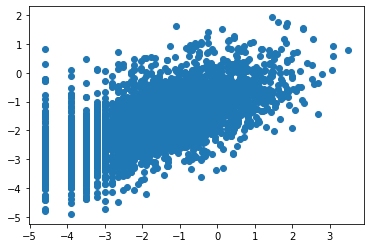

In [223]:
plt.scatter(y_train, y_pred)

In [224]:
res = y_train - y_pred 

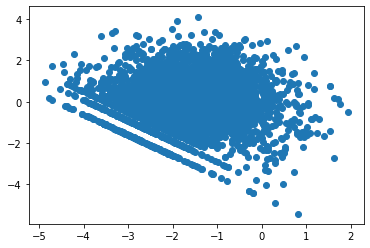

In [225]:
plt.scatter(y_pred, res)

# Interactions

In [239]:
X_train.head()

,Year_of_Release,Name_Character_Length,Name_Word_Count,E10+,EC,M,RP,T,Unknown,Adventure,...,Platform_XOne,Publisher_Avg,IN_Adventure_Platform_PS2,IN_Adventure_Platform_PS3,IN_Adventure_Platform_PS4,IN_Adventure_Platform_Wii,IN_Adventure_Platform_WiiU,IN_Adventure_Platform_X360,IN_Adventure_Platform_XB,IN_Adventure_Platform_XOne
2945,2012.0,14,3,0,0,0,0,0,0,0,...,0,1.062156,0,0,0,0,0,0,0,0
5770,2010.0,19,4,0,0,0,0,1,0,0,...,0,0.308578,0,0,0,0,0,0,0,0
14941,2011.0,41,6,0,0,0,0,0,1,0,...,0,0.448155,0,0,0,0,0,0,0,0
6379,2010.0,21,4,0,0,0,0,0,0,0,...,0,0.095000,0,0,0,0,0,0,0,0
2653,2009.0,16,3,0,0,0,0,0,1,0,...,0,0.746655,0,0,0,0,0,0,0,0


In [229]:
list(enumerate(X_train.columns))

[(0, 'Year_of_Release'),
 (1, 'Name_Character_Length'),
 (2, 'Name_Word_Count'),
 (3, 'E10+'),
 (4, 'EC'),
 (5, 'M'),
 (6, 'RP'),
 (7, 'T'),
 (8, 'Unknown'),
 (9, 'Adventure'),
 (10, 'Fighting'),
 (11, 'Misc'),
 (12, 'Puzzle'),
 (13, 'Racing'),
 (14, 'Role-Playing'),
 (15, 'Shooter'),
 (16, 'Simulation'),
 (17, 'Sports'),
 (18, 'Strategy'),
 (19, 'Platform_PS2'),
 (20, 'Platform_PS3'),
 (21, 'Platform_PS4'),
 (22, 'Platform_Wii'),
 (23, 'Platform_WiiU'),
 (24, 'Platform_X360'),
 (25, 'Platform_XB'),
 (26, 'Platform_XOne'),
 (27, 'Publisher_Avg')]

In [238]:
#Add the interaction for Adevnture and platform
for cols in list(range(19, 27)):
    X_train[f'IN_Adventure_{X_train.columns[cols]}'] = X_train['Adventure']  * X_train.loc[:, X_train.columns[cols]]

scripts//methods_globals_constants.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [240]:
action_platform_inter = LinearRegression()
action_platform_inter.fit(X_train, y_train)
y_pred = action_platform_inter.predict(X_train)

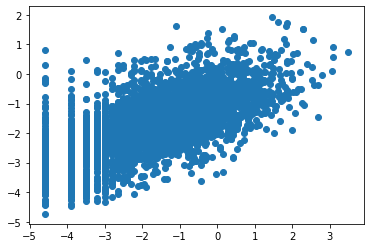

In [241]:
plt.scatter(y_train, y_pred)

In [242]:
res = y_train - y_pred 

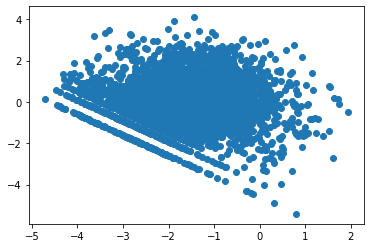

In [243]:
plt.scatter(y_pred, res)

# Cleaned Data Exploratory Analysis

In [ ]:
"""
The user and critic score are on two different scales. Critics scores are 0-100, User scores are 0-10
"""

display(video_game_null_fill_df['Critic_Score'].describe())
display(video_game_null_fill_df['User_Score'].describe())

# Cleaned Data Exploratory Visual

In [ ]:
"""
By the year 2000 there was no signicant online present for metacritic. Below games released before 1995 were removed.
"""
print('Dataframe with filled nan values')
sns.pairplot(video_game_null_fill_df);

In [ ]:
"""
Critic score and count are strongly correlated suggesting the number of critque averages out the game's score
"""
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(video_game_null_fill_df.corr(), annot=True, ax=ax);

In [ ]:
"""
The User scores and critic score are on different scales being 0-10 and 0-100 respectfully. 
Dispite this the distrubtions do look normal so critics and users may review the same way
"""
fig, ax = plt.subplots(figsize=(15,8))  

ax.hist(video_game_null_fill_df['Critic_Score'])
ax.hist(video_game_null_fill_df['User_Score']);

In [ ]:
"""
The critics total of reviews per game is so small compared to count of user reviews,
the critics histogram doesn't appear at all. One thing about them is their skewness to the left. 
Both have the same form of skewness where for a particular game there are way more than normal
"""

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))  

ax[0].hist(video_game_null_fill_df['Critic_Count'])
ax[0].hist(video_game_null_fill_df['User_Count'])

ax[1].hist(video_game_null_fill_df['Critic_Count']);;

In [ ]:
"""
Oh no..... What 
"""

fig, ax = plt.subplots(figsize=(15,8))  

ax.bar(x = video_game_null_fill_df['Year_of_Release'], height = video_game_null_fill_df['Critic_Count']);

In [ ]:
video_game_null_fill_df[video_game_null_fill_df['Year_of_Release'] == 2020]

# Encoding

In [ ]:
_ = pd.get_dummies(video_game_null_fill_df[['Platform']], drop_first=True)
list(pd.concat([video_game_null_fill_df, _], axis=1, sort=False).columns)[12:].sort()

In [ ]:
print(video_game_null_fill_df['Platform'].unique())
print(video_game_null_fill_df['Platform'].shape)

# Scaling/Normalizing Data

In [ ]:
video_game_df[feat].map(lambda x: np.log(x))

In [ ]:
# Min-Max scaling User score and Critic score for interpretation

_ = video_game_null_fill_df['Critic_Score']
video_game_null_fill_df['Critic_Score'] = (_-min(_))/(max(_)-min(_))
video_game_null_fill_df['User_Score'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))



data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
>>> scaler = MinMaxScaler()
>>> print(scaler.fit(data))
MinMaxScaler()
>>> print(scaler.data_max_)
[ 1. 18.]
>>> print(scaler.transform(data))
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
>>> print(scaler.transform([[2, 2]]))
[[1.5 0. ]]

# [Video Game]
#### Data World 
    *https://data.world/craigkelly/steam-game-data
    [Shareholder] They are a publisher, they want buy a new team but want to make sure they make good choice
        [Question1] Can we build a predict/regression model to predict a potential interval for steamspyowners? 
        [Question2] Metacritic scores are from 0 -100. Could we build a classifer model?
#### Kaggle
	*https://www.kaggle.com/gregorut/videogamesales
	*https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
	*https://www.kaggle.com/kendallgillies/video-game-sales-and-ratings
     [Shareholder] They are a publisher is looking for recommendations for what types of game to make
         [Question1] Can we pridict Global_Sales


# [Animals]
##### Kaggle 
    *https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and
    [Shareholder] ?????
    
    [Not Enough]https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation
    [Not independent]https://www.kaggle.com/se18m502/bee-hive-metrics#weight_2017.csv
    [Not independent]https://www.kaggle.com/hocop1/cat-and-dog-breeds-parameters
    [Not independent]https://www.kaggle.com/jessicali9530/honey-production
    
# [Medical]
##### Kaggle
    [Not independent]https://www.kaggle.com/de5d5fe61fcaa6ad7a66/coronavirus-dataset-update-0206

# [Vehicle]
##### Data World
    https://data.world/nhtsa/nhtsas-odi-recalls/workspace/project-summary?agentid=nhtsa&datasetid=nhtsas-odi-recalls

##### Kaggle
    https://www.kaggle.com/austinreese/craigslist-carstrucks-data
    [ShareHolder] A small start up want to build an app to help people buy better cars off craiglist. 
        [Question1] Can we classify the cars by title_status?
        [Question2] Can we predict the odometer for the car?
        [Question3] Can we classify condition
        
    *https://www.kaggle.com/mirosval/personal-cars-classifieds
    [ShareHolder] Find cars for people app
        [Question]The user get an estimate of price_eur based on car details
        
# [Misc]
##### Buzzfeed
    *https://github.com/BuzzFeedNews/2014-06-firework-injuries
    [Shareholder] We're an evil insurance company, which collection of people should we raise the price? 
    [Question]
    
    *https://www.kaggle.com/rusiano/snooker-data-19822020#players_r.csv